# Fatal police shootings in the United States of America

## Author: Payal Narvekar

Police shootings have been an increasing trend in the United States since 2014. We are not even halfway through 2022 and there have been a total of 241 civilians killed this year in fatal police shootings. With the dataset used, we can draw important insights about these incidents and the victims. Through this article I am aiming to bring forward this information in the form of interactive dashboards and easy-to-understand visualizations.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import bqplot
import numpy as np
import ipywidgets
import seaborn as sns
import bqplot
from bqplot import pyplot as plt

In [2]:
ps = pd.read_csv("https://think.cs.vt.edu/corgis/datasets/csv/police_shootings/police_shootings.csv")
ps

,Person.Name,Person.Age,Person.Gender,Person.Race,Incident.Date.Month,Incident.Date.Day,Incident.Date.Year,Incident.Date.Full,Incident.Location.City,Incident.Location.State,Factors.Armed,Factors.Mental-Illness,Factors.Threat-Level,Factors.Fleeing,Shooting.Manner,Shooting.Body-Camera
0,Tim Elliot,53,Male,Asian,1,2,2015,2015/01/02,Shelton,WA,gun,True,attack,Not fleeing,shot,True
1,Lewis Lee Lembke,47,Male,White,1,2,2015,2015/01/02,Aloha,OR,gun,True,attack,Not fleeing,shot,True
2,John Paul Quintero,23,Male,Hispanic,1,3,2015,2015/01/03,Wichita,KS,unarmed,True,other,Not fleeing,shot and Tasered,True
3,Matthew Hoffman,32,Male,White,1,4,2015,2015/01/04,San Francisco,CA,toy weapon,True,attack,Not fleeing,shot,True
4,Michael Rodriguez,39,Male,Hispanic,1,4,2015,2015/01/04,Evans,CO,nail gun,True,attack,Not fleeing,shot,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6564,Unknown,0,Male,Unknown,9,7,2021,2021/09/07,Fruit Cove,FL,gun,True,attack,Not fleeing,shot,True
6565,Anthony Cravo,52,Male,Unknown,9,7,2021,2021/09/07,Lufkin,TX,gun,True,attack,Not fleeing,shot,True
6566,Cedric Williams,29,Male,Unknown,9,10,2021,2021/09/10,Oxon Hill,MD,toy weapon,True,other,unknown,shot,True
6567,Desmond Lewis,30,Male,Unknown,9,11,2021,2021/09/11,Shreveport,LA,gun,True,attack,Foot,shot,True


In [3]:
# Data
table1 = pd.pivot_table(ps, index = ["Person.Race"], values = ["Person.Age"], columns = ["Incident.Date.Year"], aggfunc = np.mean)
table1

Person.Age                                              \
Incident.Date.Year       2015       2016       2017       2018       2019   
Person.Race                                                                 
African American    31.620155  30.406780  32.067265  33.099138  32.203187   
Asian               37.200000  36.733333  31.750000  39.454545  36.100000   
Hispanic            33.289017  32.130435  32.270718  33.047619  33.345238   
Native American     30.444444  32.117647  29.272727  34.437500  30.923077   
Other               31.428571  33.272727  30.833333  22.750000  38.333333   
Unknown             46.782609  34.980769  29.233766  25.689655  31.333333   
White               39.661355  40.049462  39.908696  39.013015  39.485849   

                                          
Incident.Date.Year       2020       2021  
Person.Race                               
African American    33.352459  31.194444  
Asian               31.466667  28.333333  
Hispanic            33.011696  31.559322  
Native American     34.111111  34.800000  
Other               24.333333        NaN  
Unknown             31.441667  30.124514  
White               38.697168  37.926702

In [4]:
# Scales
col_sc = bqplot.ColorScale(scheme = 'RdPu')
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# Axis
col_ax = bqplot.ColorAxis(scale = col_sc, orientation = 'vertical', side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label = 'Year')
y_ax = bqplot.Axis(scale = y_sc, orientation = 'vertical', label = 'Person Race', tick_rotate=60)

years = table1.columns.levels[1].to_list()
heat_map = bqplot.GridHeatMap(color = table1.values,
                              row = table1.index,
                              column = years,
                              scales = {'color': col_sc, 'row': y_sc, 'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

fig = bqplot.Figure(marks = [heat_map], axes = [col_ax, x_ax, y_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='RdPu'), side='right'), Axis(label='Yea…

In [5]:
# Scales
x_scb = bqplot.OrdinalScale()
y_scb = bqplot.LinearScale()

# Axis
x_axb = bqplot.Axis(label = 'State', scale = x_scb)
y_axb = bqplot.Axis(label = 'Mean Age of Victims', scale = y_scb, 
                    orientation = 'vertical', side = 'left')

i,j = 0,1

mask = (ps['Person.Race'] == table1.index[i]) & \
       (ps['Incident.Date.Year'] == table1.columns.levels[1][j])

ps_subset = ps[mask]

grouped = ps_subset.groupby("Incident.Location.State")["Person.Age"].mean()
state = grouped.index
age = grouped.values

# Plot
bar = bqplot.Bars(x = state, y = age, scales = {'x': x_scb, 'y': y_scb})

fig_bar = bqplot.Figure(marks = [bar], axes = [x_axb, y_axb])
fig_bar

Figure(axes=[Axis(label='State', scale=OrdinalScale()), Axis(label='Mean Age of Victims', orientation='vertica…

# An interactive dashboard to understand fatal police shooting statistics

In [6]:
def get_data_value(change):
    i,j = change['owner'].selected[0]
    mask = (ps['Person.Race'] == table1.index[i]) & \
       (ps['Incident.Date.Year'] == table1.columns.levels[1][j])

    # grab buildings subset dataframe
    ps_subset = ps[mask]
    # grab year acquired and square footage from pandas
    grouped = ps_subset.groupby("Incident.Location.State")["Person.Age"].mean()
    state = grouped.index
    age = grouped.values
    bar.x = state
    bar.y = age
    
heat_map.observe(get_data_value, 'selected')

fig = bqplot.Figure(marks = [heat_map], axes = [col_ax, y_ax, x_ax], 
                    fig_margin = dict(top=50, bottom=150, left=50, right=50))
fig.layout.align_items

fig.layout.min_width='450px'
fig.layout.min_height='650px'
fig_bar.layout.min_width='650px'

ipywidgets.HBox([fig,fig_bar])

This dashboard has been created using data about police shootings that resulted in fatalities which is made by The Washington Post and is available for the public at https://think.cs.vt.edu/corgis/datasets/csv/police_shootings/police_shootings.csv . It has data from January 1, 2015 and is updated everytime new information is found. Until now 7,330 civilians have been shot by the police. 

These two visualizations are linked to each other, the heat map on the left 'drives' the bar plot on the right. The heat map categorizes the victims of fatal police shootings that took place from 2015 through 2021 and also categorizes it by the race of the person. The values are the mean age of the victims in that category. On selecting a grid on the left, the bar plot on the right shows the mean age of the victims state-wise. 

As we go through the data by selecting grids on the left, we can draw inferences like we can see that African American people have been victims of these police shootings in almost all states listed, every year. This is less common amongst the other races. We can see that police shootings in which Asian people were victims took place repeatedly in a few states like California, Texas and Washington. This can be an indication that certain states can tend to be racist towards certain groups of people.

So it is noticed that certain races and age groups are more targeted in some states, like in 2016 a large number of victims in Kentucky were African American people in their late fifties. These are the kind of insights that I want the readers to draw from these visualizations. Readers can use the interactive dashboard to draw inferences of their own.

# A histogram to understand number of incidents every year

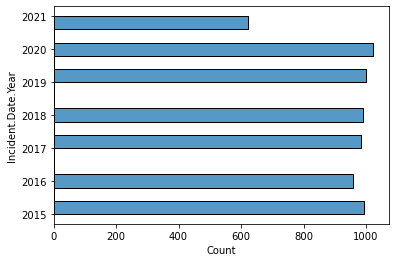

In [7]:
sns.histplot(y=ps['Incident.Date.Year'])

From this histogram we see that 2019 and 2020 had the highest number of police shooting incidents that resulted in fatalities. If you use this information to go back to the previous dashboard, you can see that White and Asian people made up a majority of the victims in these two years. 

2019 and 2020 were years when a political unrest was observed as the elections were underway. In May 2020, George Floyd was killed by a police officer in Minnesota. This led to multiple protests against incidents of police brutality and racism, but that did not lead to a decrease in the number of incidents. That could be a reason for the high numbers in these years. 

In [8]:
import PIL.Image as Image

# Are Black people being targeted more than others?

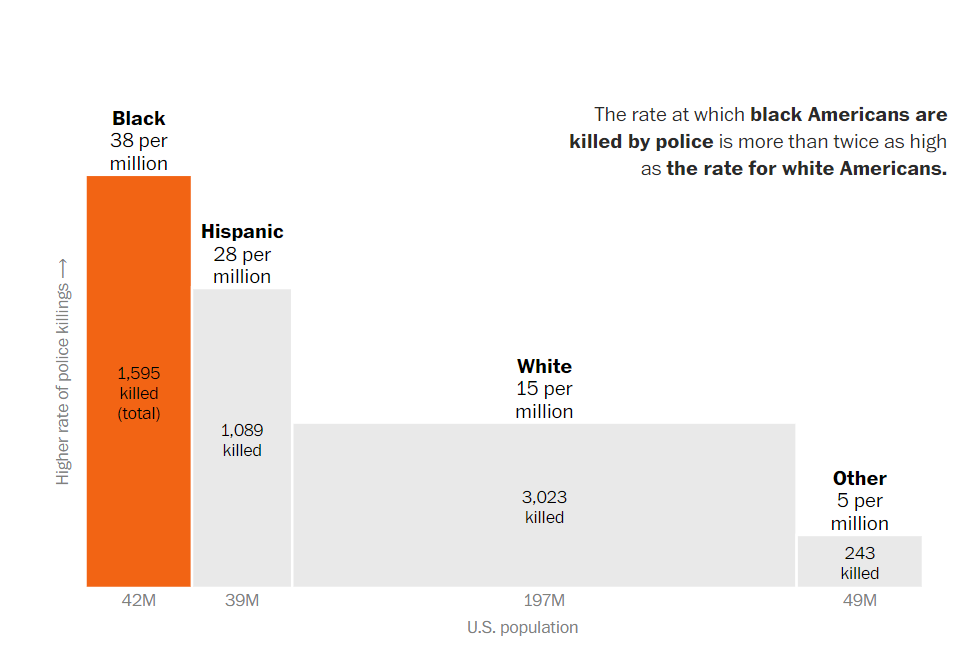

In [9]:
image1 = Image.open("viz1.PNG")
image1

Racism against Black people is not uncommon and in many cases, the people that have been shot were unarmed and posed no threat. We can see from the image that the rate at which Black people are targeted is the highest. Black people made up 13% of America's population but 27% of the victims shot in 2021. The patterns observed regarding this kind of racism are alarming. 

Reference: https://www.washingtonpost.com/graphics/investigations/police-shootings-database/

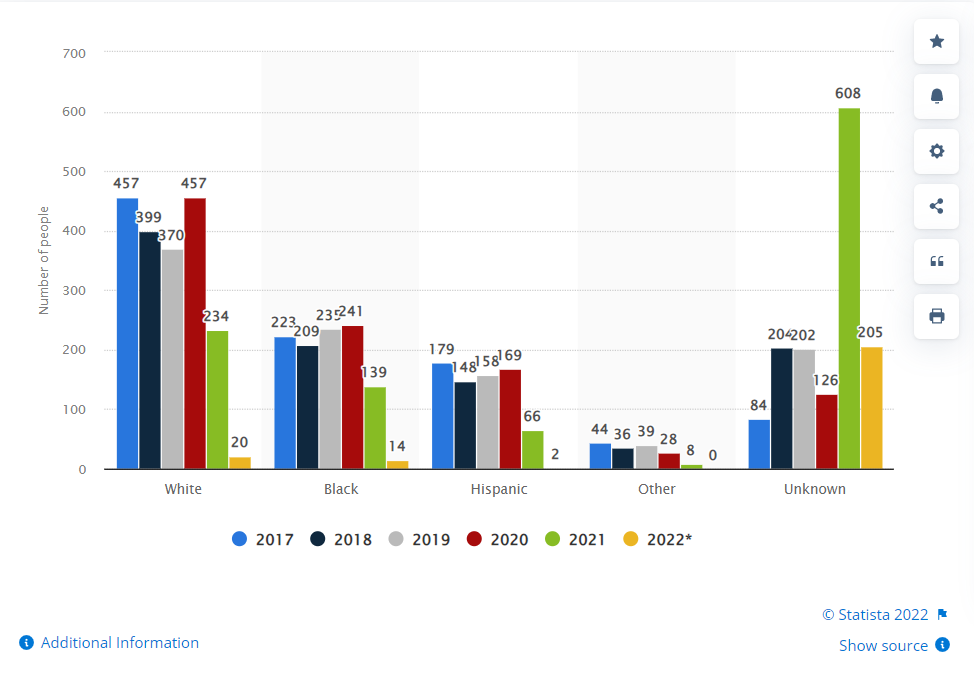

In [10]:
image2 = Image.open("viz3.PNG")
image2

Out of the 241 civilians shot by the police in 2022, 14 were Black people and 20 were White people. Considering the percentage of population of each race, the rate of Black people being victims is still high in 2022 as well.

Reference: https://www.statista.com/statistics/585152/people-shot-to-death-by-us-police-by-race/


# What was the age of the victims?

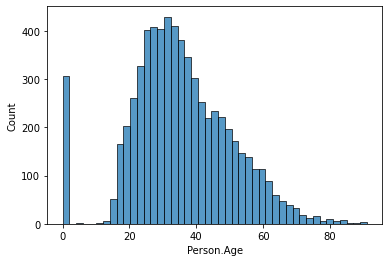

In [11]:
sns.histplot(ps['Person.Age'])

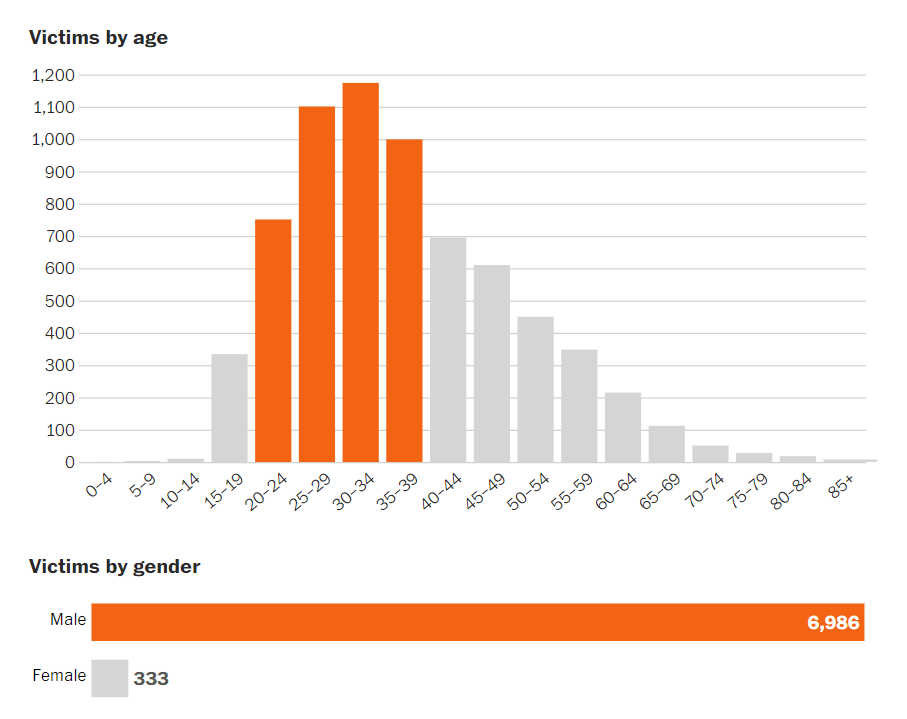

In [12]:
image3 = Image.open("viz2.PNG")
image3

Through the histogram created from the dataset and this image, we see that most victims were males and were between the ages of 20 and 40. Males make up over 95% of the total victims.

Reference: https://www.washingtonpost.com/graphics/investigations/police-shootings-database/

From the dashboard and visualizations we see how police brutality and shootings have increased over the years and is in most cases racially charged. These incidents have given rise to movements like Black Lives Matter and brought people together to resist racial bias and speak up against police brutality. Even with these things happening there is no sign of a decline in the number of incidents taking place. It is a topic of major concern and I hope this article helps the reader understand the statistics behind it better because it is not just about numbers but about actual peeople.


# Dataset 

https://think.cs.vt.edu/corgis/datasets/csv/police_shootings/police_shootings.csv

# References

https://www.washingtonpost.com/graphics/investigations/police-shootings-database/

https://www.npr.org/2021/01/25/956177021/fatal-police-shootings-of-unarmed-black-people-reveal-troubling-patterns

https://www.statista.com/statistics/585152/people-shot-to-death-by-us-police-by-race/

https://www.nbcnews.com/news/nbcblk/report-black-people-are-still-killed-police-higher-rate-groups-rcna17169
